In [1]:
import lib.load as load
import gzip
import numpy as np
from numba import njit
import pandas as pd
import matplotlib.pyplot as plt

# Testing

In [2]:
t = %timeit -n1 -r1 -o loaded = load.read_files('random_file_paths.txt')
print(f"Took {t.average} seconds to load {len(loaded)} rows with pd.read_csv.")

12.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


NameError: name 'loaded' is not defined

# Prototyping

In [ ]:
def load_tsv_list(paths):
    
    # If input is not a list, open the string as path.
    if not isinstance(paths, list):
        # Open a file with MLHD file paths to process
        with open(paths, 'r') as f:
            file_paths = f.readlines()
            file_paths= [item.strip() for item in file_paths]
    
    # If it's a list, just use it.
    else:
        file_paths = paths
    
    final = [['timestamp', 'artist-MBID', 'release-MBID', 'recording-MBID']]
    for path in file_paths:
        with gzip.open(path) as f:
            lines = f.readlines()
            lines = [l.strip().decode().split('\t') for l in lines]
            final.extend(lines)

    return final

In [ ]:
%%time

loaded = (load_tsv_list('random_file_paths.txt'))

print("^ time take with custom python list function")

^ time take with custom python list function
CPU times: user 11.5 s, sys: 835 ms, total: 12.3 s
Wall time: 12.3 s


In [ ]:
%%time
df = pd.DataFrame(load_tsv_list('random_file_paths.txt'))

CPU times: user 9.48 s, sys: 900 ms, total: 10.4 s
Wall time: 10.4 s


It takes ~ 12.3 + 10.4 = 22.7s to load with custom python list based function.

In [ ]:
%%time
results = dict()
for i in range(25):
    t = %timeit -n1 -r1 -o length = len(load.read_files('random_file_paths.txt', i))
    results[i] = t.average

results

3.26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
73.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
96 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
171 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
174 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
510 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
590 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
638 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
670 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
730 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
866 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
901 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
954 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.04 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.23 s ± 0 ns per loop (mean ± std. dev

{0: 0.0032601356506347656,
 1: 0.07320570386946201,
 2: 0.09600847121328115,
 3: 0.17105929553508759,
 4: 0.17449340876191854,
 5: 0.5098736453801394,
 6: 0.5900380257517099,
 7: 0.6377436341717839,
 8: 0.6696371771395206,
 9: 0.7298476714640856,
 10: 0.8658907525241375,
 11: 0.9012174168601632,
 12: 0.9539283607155085,
 13: 1.0437240563333035,
 14: 1.0770620768889785,
 15: 1.2293056678026915,
 16: 1.271242999471724,
 17: 1.3261178135871887,
 18: 1.360446384176612,
 19: 1.4577521346509457,
 20: 1.4887179946526885,
 21: 1.6807096609845757,
 22: 1.8390222005546093,
 23: 1.8853321950882673,
 24: 1.981857780367136,
 25: 2.0461628809571266,
 26: 2.103713388554752,
 27: 2.2771945102140307,
 28: 2.372042658738792,
 29: 2.477357462979853,
 30: 2.6981900734826922,
 31: 2.793612760491669,
 32: 2.885702785104513,
 33: 2.996873059310019,
 34: 3.1481933323666453,
 35: 3.2399295680224895,
 36: 3.4077690429985523,
 37: 3.6048339009284973,
 38: 3.6998676136136055,
 39: 3.8199608977884054,
 40: 3.92933

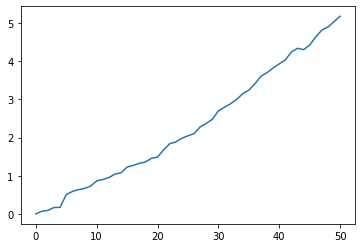

In [ ]:
plt.plot(results.keys(), results.values())